# Used Cars Data Analysis and Visualization

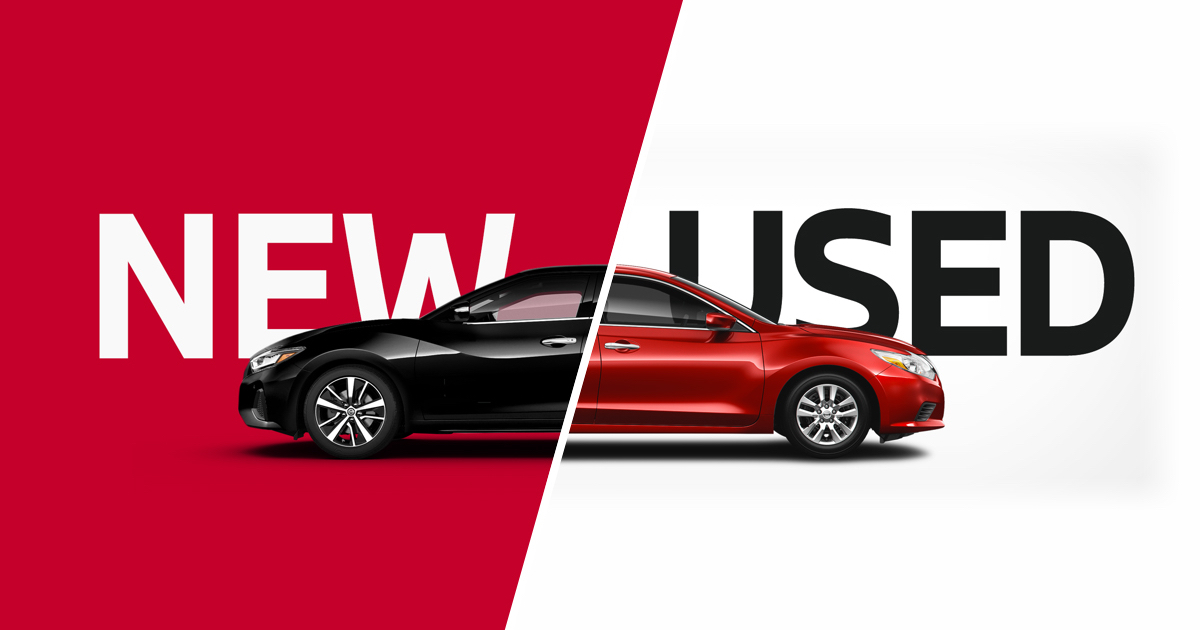

In [1]:
from PIL import Image
img = Image.open("buying-a-new-vs-used-car-pros-and-cons.jpg")
img

### About Used Cars Data

Craigslist is the world's largest collection of used vehicles for sale. The data provider built a scraper for a school project and expanded upon it later to create this dataset which includes every used vehicle entry within the United States on Craigslist.

**Reference Link:** https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

### Inspiration

Buyers paid **12.2%** more for new vehicles in January 2022 than in January 2021, and the picture was even worse for used vehicles, which were up more than 40 percent year over year. COVID-19, the resulting chip shortage, and now the Russian invasion of Ukraine are all parts of the problem. Those may end, but expect the car-buying experience to be permanently changed.

Right now, most shoppers are paying a premium for their cars compare to the year before. According to the analysis, the average used car price rose to $33,464 in February, which is about 1% higher than January. While prices may come down some as the year goes on, the used car market will still face high demand.

As the result, it got me inspired to working on this dataset that I found on Kaggle. I hope we can find out some interesting facts

**Reference Link:** https://www.caranddriver.com/news/a39357957/car-prices-high-when-will-change/

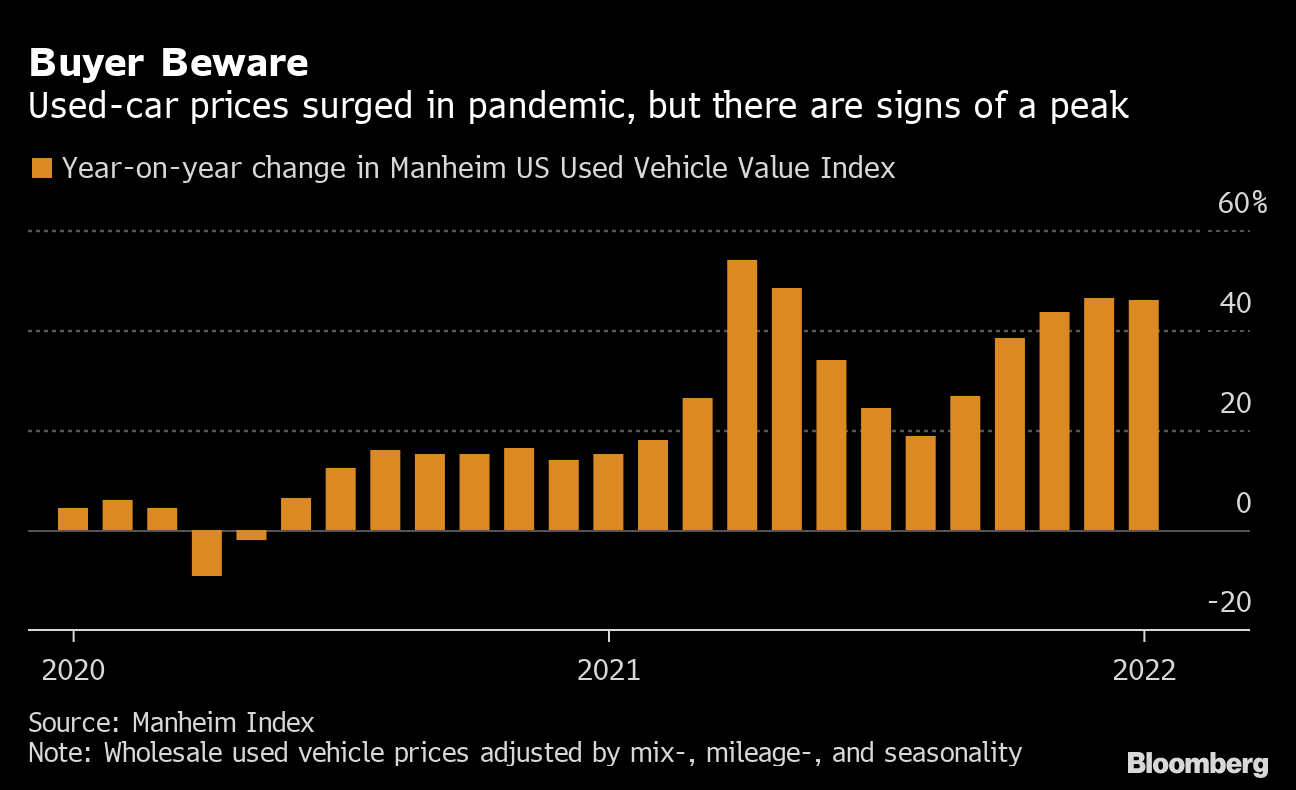

In [2]:
from PIL import Image
img = Image.open("car.png")
img

##### Image credit - Bloomberg

### Installing / Importing libraries 

In [3]:
# Install missingo because its not installed
!pip install missingno
!pip install plotly==5.7.0

In [4]:
# Data Analytics
import numpy as np 
from numpy import median
from numpy import mean
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
from sklearn import linear_model
%matplotlib inline

### Reading Data

In [5]:
df = pd.read_csv("vehicles.csv")
pd.read_csv("vehicles.csv") 
df.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  

[5 rows x 26 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
# See how many missing value in the dataset
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

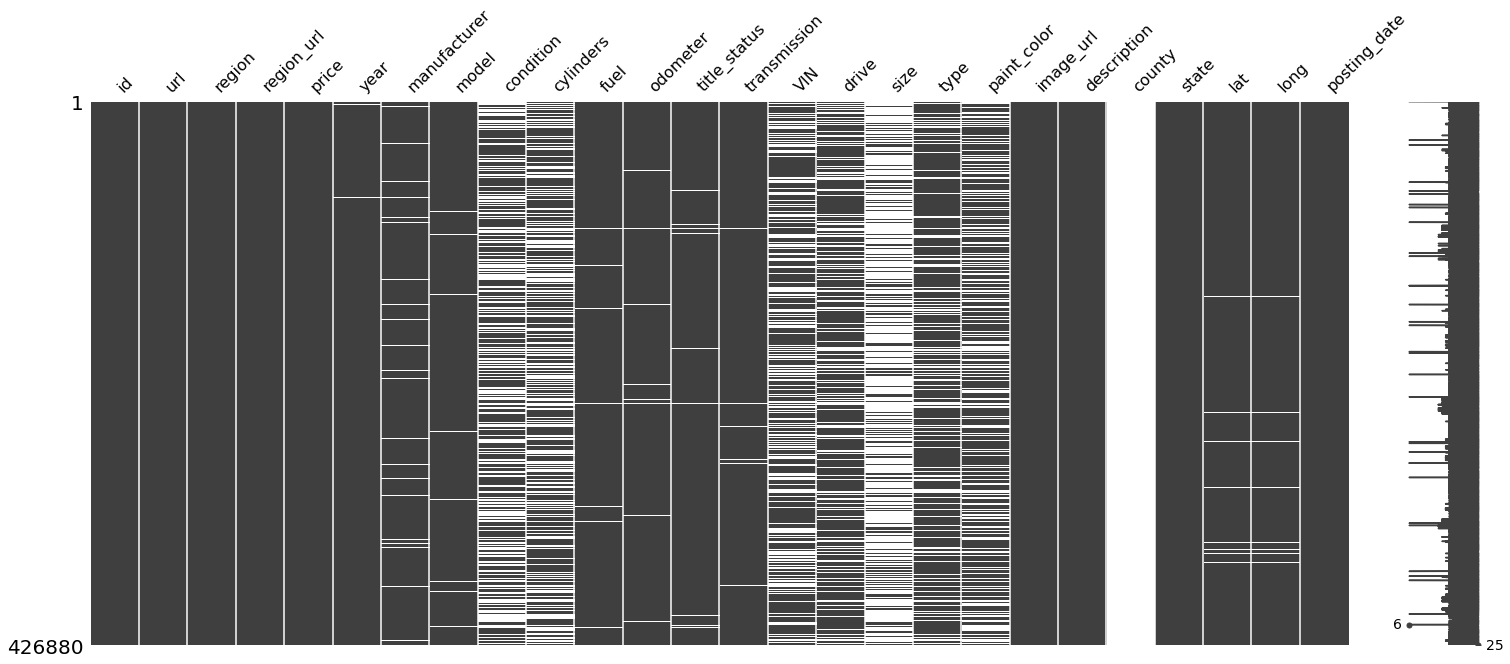

In [8]:
#Checking miss data through missingo 
#Inspired by: https://www.kaggle.com/code/ismailsefa/used-cars-data-analysis-and-visualization-eda
msno.matrix(df)
plt.show()

##### There are some missing values in the dataset, Let's clean it out!

### Cleaning Data

In [9]:
# inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated
df.drop(columns=['id','url','image_url','VIN','region_url','description','lat','long'],inplace=True)

In [10]:
df.head(10)

region  price  year manufacturer model condition cylinders  \
0                prescott   6000   NaN          NaN   NaN       NaN       NaN   
1            fayetteville  11900   NaN          NaN   NaN       NaN       NaN   
2            florida keys  21000   NaN          NaN   NaN       NaN       NaN   
3  worcester / central MA   1500   NaN          NaN   NaN       NaN       NaN   
4              greensboro   4900   NaN          NaN   NaN       NaN       NaN   
5           hudson valley   1600   NaN          NaN   NaN       NaN       NaN   
6           hudson valley   1000   NaN          NaN   NaN       NaN       NaN   
7           hudson valley  15995   NaN          NaN   NaN       NaN       NaN   
8         medford-ashland   5000   NaN          NaN   NaN       NaN       NaN   
9                    erie   3000   NaN          NaN   NaN       NaN       NaN   

  fuel  odometer title_status transmission drive size type paint_color  \
0  NaN       NaN          NaN          NaN   NaN  NaN  NaN         NaN   
1  NaN       NaN          NaN          NaN   NaN  NaN  NaN         NaN   
2  NaN       NaN          NaN          NaN   NaN  NaN  NaN         NaN   
3  NaN       NaN          NaN          NaN   NaN  NaN  NaN         NaN   
4  NaN       NaN          NaN          NaN   NaN  NaN  NaN         NaN   
5  NaN       NaN          NaN          NaN   NaN  NaN  NaN         NaN   
6  NaN       NaN          NaN          NaN   NaN  NaN  NaN         NaN   
7  NaN       NaN          NaN          NaN   NaN  NaN  NaN         NaN   
8  NaN       NaN          NaN          NaN   NaN  NaN  NaN         NaN   
9  NaN       NaN          NaN          NaN   NaN  NaN  NaN         NaN   

   county state posting_date  
0     NaN    az          NaN  
1     NaN    ar          NaN  
2     NaN    fl          NaN  
3     NaN    ma          NaN  
4     NaN    nc          NaN  
5     NaN    ny          NaN  
6     NaN    ny          NaN  
7     NaN    ny          NaN  
8     NaN    or          NaN  
9     NaN    pa          NaN

### Exploratory Data Analysis

#### Visualize cars by states

In [13]:
df['state'].value_counts()

ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: state, dtype: int64

<AxesSubplot:title={'center':'Count'}, xlabel='State', ylabel='Count'>

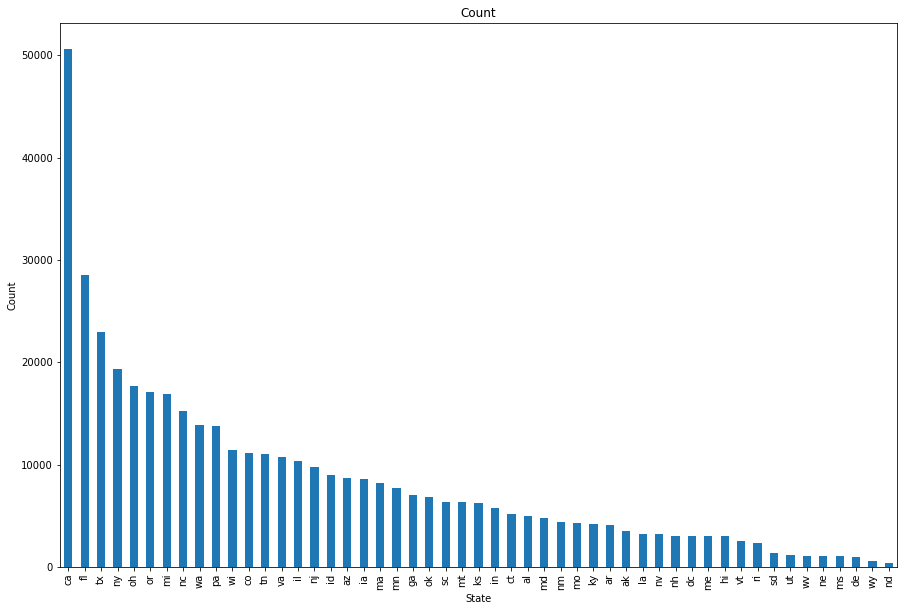

In [14]:
plt.figure(figsize=(15,10))
df['state'].value_counts().plot(kind='bar', title='Count', ylabel='Count', xlabel='State')

<AxesSubplot:title={'center':'Mean Price by manufacturer'}, xlabel='manufacturer', ylabel='Mean Price (USD)'>

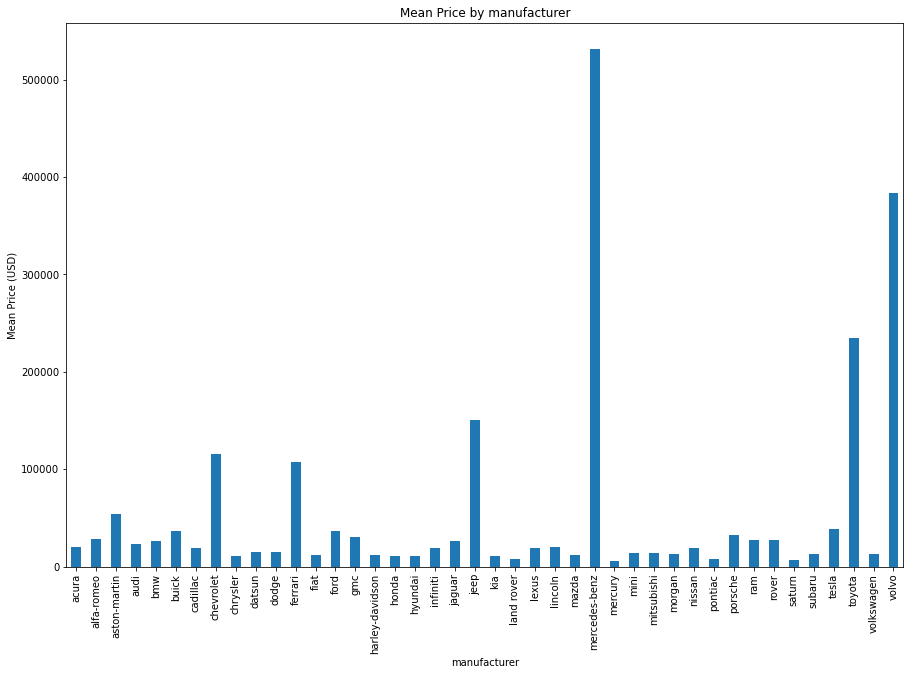

In [15]:
plt.figure(figsize=(15,10))
df.groupby('manufacturer')['price'].mean().plot(kind='bar', title='Mean Price by manufacturer', xlabel='manufacturer', ylabel='Mean Price (USD)')

#### Visualize price by year production

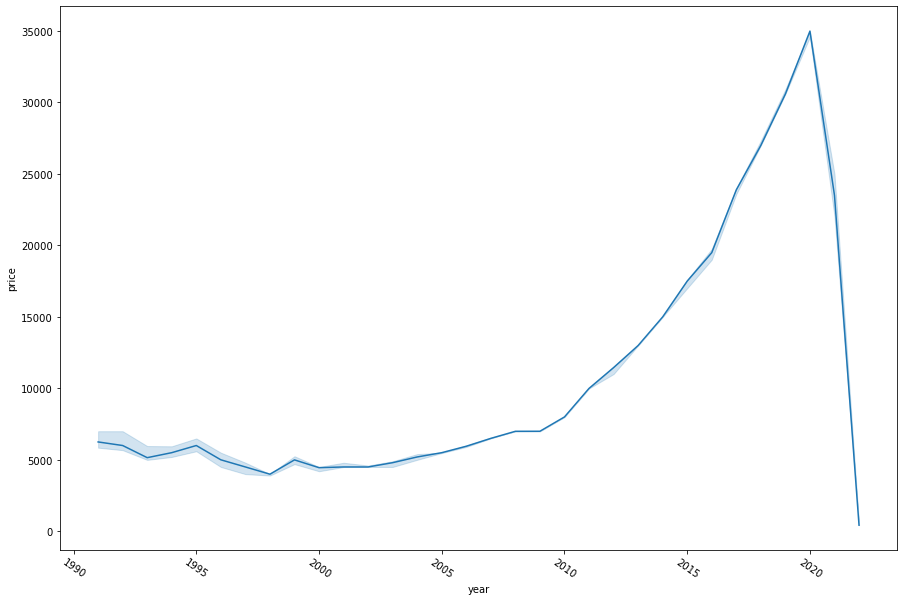

In [31]:
df_year = df[(df["year"]>1990) & (df["year"]<=2022)].copy()
plt.figure(figsize=(15,10))
plt.xticks(rotation= -35)
sns.lineplot(data= df_year,x="year", y= "price",estimator=median)
plt.show()

We noticed that the median price was oing downwards after the year of 2020, which is contradictive to our original thought. Let's dive into the data to see what's going on?

In [34]:
df[df.year == 2021]

region  price    year manufacturer                  model  \
26625   fresno / madera  15990  2021.0          NaN  CTEC 83-38-VTF-HFT-79   
196374    detroit metro   1037  2021.0     cadillac     xt6 premium luxury   
196289    detroit metro    790  2021.0     cadillac     ct4 premium luxury   
193826        ann arbor    886  2021.0     cadillac          ct4 sport awd   
193811        ann arbor    850  2021.0     cadillac          ct4 sport awd   
...                 ...    ...     ...          ...                    ...   
389529  charlottesville      0  2021.0   volkswagen                 tiguan   
390058         danville      0  2021.0   volkswagen                 tiguan   
390064         danville      0  2021.0   volkswagen                 tiguan   
392483        lynchburg      0  2021.0   volkswagen                 tiguan   
421780          madison      0  2021.0    chevrolet     5500 4 x 4 chassis   

        condition    cylinders fuel  odometer title_status transmission drive  \
26625   excellent          NaN  gas       0.0        clean    automatic   NaN   
196374  excellent  6 cylinders  gas       0.0          NaN    automatic   4wd   
196289  excellent  4 cylinders  gas       0.0          NaN    automatic   4wd   
193826  excellent  4 cylinders  gas       0.0          NaN    automatic   4wd   
193811  excellent  4 cylinders  gas       0.0          NaN    automatic   4wd   
...           ...          ...  ...       ...          ...          ...   ...   
389529        NaN          NaN  NaN       NaN          NaN          NaN   NaN   
390058        NaN          NaN  NaN       NaN          NaN          NaN   NaN   
390064        NaN          NaN  NaN       NaN          NaN          NaN   NaN   
392483        NaN          NaN  NaN       NaN          NaN          NaN   NaN   
421780        new          NaN  gas       NaN        clean    automatic   NaN   

       size   type paint_color  county state              posting_date  \
26625   NaN    NaN         NaN     NaN    ca  2021-04-27T16:01:53-0700   
196374  NaN    SUV         NaN     NaN    mi  2021-05-03T17:04:15-0400   
196289  NaN  sedan         NaN     NaN    mi  2021-05-04T08:01:20-0400   
193826  NaN  sedan         NaN     NaN    mi  2021-04-29T17:05:11-0400   
193811  NaN  sedan         NaN     NaN    mi  2021-04-30T08:01:39-0400   
...     ...    ...         ...     ...   ...                       ...   
389529  NaN    NaN         NaN     NaN    va  2021-04-22T15:14:33-0400   
390058  NaN    NaN         NaN     NaN    va  2021-04-22T15:14:16-0400   
390064  NaN    NaN         NaN     NaN    va  2021-04-21T19:21:03-0400   
392483  NaN    NaN         NaN     NaN    va  2021-04-05T14:12:08-0400   
421780  NaN    NaN         NaN     NaN    wi  2021-04-08T07:45:27-0500   

                           make_model  
26625                             NaN  
196374   cadillac: xt6 premium luxury  
196289   cadillac: ct4 premium luxury  
193826        cadillac: ct4 sport awd  
193811        cadillac: ct4 sport awd  
...                               ...  
389529             volkswagen: tiguan  
390058             volkswagen: tiguan  
390064             volkswagen: tiguan  
392483             volkswagen: tiguan  
421780  chevrolet: 5500 4 x 4 chassis  

[2396 rows x 19 columns]

In [39]:
df[df.year == 2022]

region  price    year manufacturer  \
153393             indianapolis      0  2022.0          NaN   
167095          kansas city, MO  27725  2022.0   mitsubishi   
106763                  orlando      1  2022.0          NaN   
136781  spokane / coeur d'alene    409  2022.0   mitsubishi   
410936                wenatchee    409  2022.0   mitsubishi   
...                         ...    ...     ...          ...   
137947  spokane / coeur d'alene    500  2022.0          NaN   
423091                milwaukee    250  2022.0          NaN   
332520             philadelphia    799  2022.0          NaN   
366833              brownsville      1  2022.0          NaN   
366733              brownsville      1  2022.0          NaN   

                                  model  condition    cylinders    fuel  \
153393  PETERBILT KENWORTH FREIGHTLINER        NaN          NaN  diesel   
167095                 eclipse cross se        new  4 cylinders  diesel   
106763               All Makes & Models   like new          NaN     gas   
136781                 eclipse cross se  excellent  4 cylinders     gas   
410936                 eclipse cross se  excellent  4 cylinders     gas   
...                                 ...        ...          ...     ...   
137947                          Unknown        NaN          NaN   other   
423091                          trailer       fair          NaN   other   
332520                        tow dolly       good        other   other   
366833                     Super Welder        NaN          NaN   other   
366733                     Super Welder        NaN          NaN   other   

          odometer title_status transmission drive       size   type  \
153393         1.0        clean    automatic   NaN        NaN    NaN   
167095         1.0        clean    automatic   fwd   mid-size    SUV   
106763         1.0        clean        other   NaN        NaN    NaN   
136781         3.0          NaN    automatic   4wd        NaN    SUV   
410936         3.0          NaN    automatic   4wd        NaN    SUV   
...            ...          ...          ...   ...        ...    ...   
137947   1111111.0      missing       manual   NaN        NaN    NaN   
423091   1111111.0        clean        other   NaN        NaN    NaN   
332520   9999999.0      missing        other   NaN  full-size  other   
366833  10000000.0        clean        other   NaN        NaN    NaN   
366733  10000000.0        clean        other   NaN        NaN    NaN   

       paint_color  county state              posting_date  \
153393         NaN     NaN    in  2021-04-06T14:43:49-0400   
167095      silver     NaN    ks  2021-04-22T11:55:47-0500   
106763       black     NaN    fl  2021-04-24T22:37:17-0400   
136781         NaN     NaN    id  2021-05-01T15:46:56-0700   
410936         NaN     NaN    wa  2021-05-01T15:46:56-0700   
...            ...     ...   ...                       ...   
137947         NaN     NaN    id  2021-04-28T16:30:19-0700   
423091         NaN     NaN    wi  2021-04-29T11:34:59-0500   
332520        grey     NaN    pa  2021-05-04T13:11:37-0400   
366833         NaN     NaN    tx  2021-04-27T10:29:32-0500   
366733         NaN     NaN    tx  2021-05-03T07:28:45-0500   

                          make_model  
153393                           NaN  
167095  mitsubishi: eclipse cross se  
106763                           NaN  
136781  mitsubishi: eclipse cross se  
410936  mitsubishi: eclipse cross se  
...                              ...  
137947                           NaN  
423091                           NaN  
332520                           NaN  
366833                           NaN  
366733                           NaN  

[133 rows x 19 columns]

#### Visualize Most Popular Colors

In [17]:
df['paint_color'].value_counts()

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64

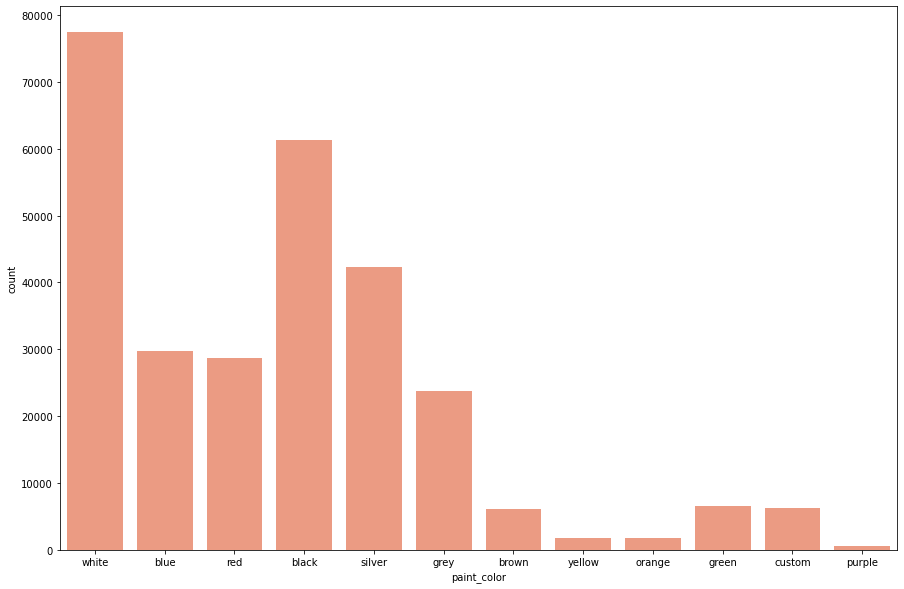

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_year,x="paint_color",palette= ["#fc9272"])
plt.show()

#### Visualized Condition by Color

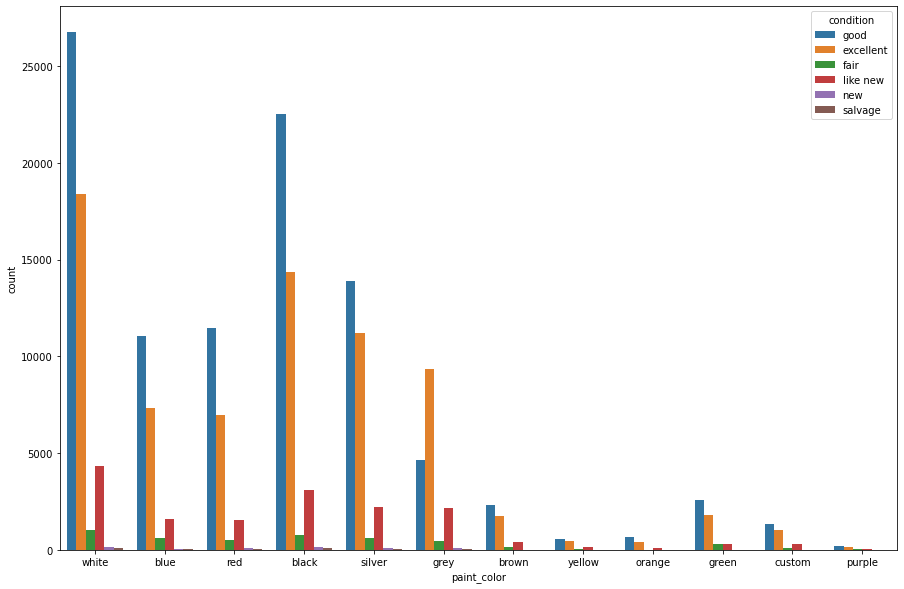

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_year, x="paint_color", hue="condition")
plt.show()

#### Visualize Odometer by Vehicle Type

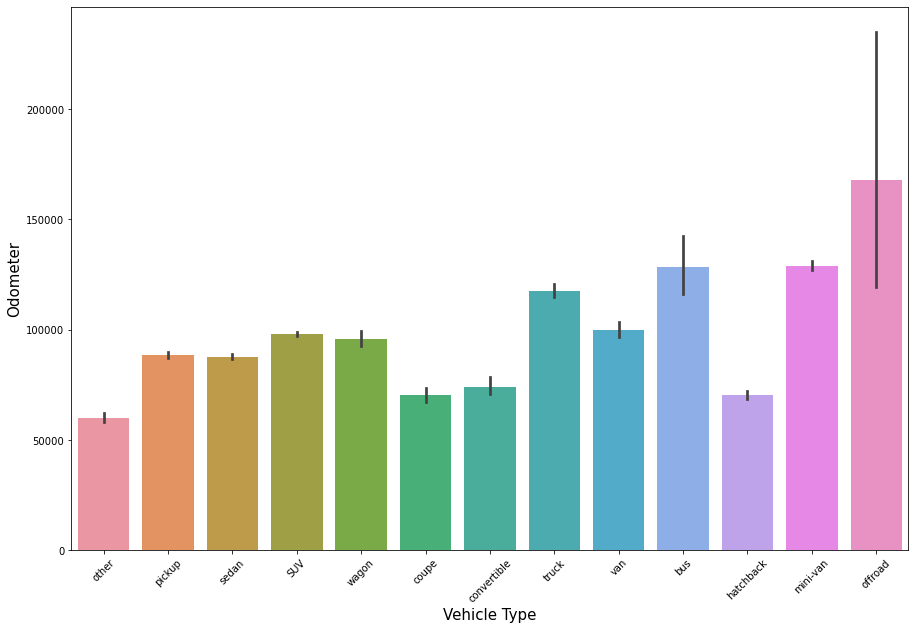

In [20]:
df=df.sort_values(['odometer'],ascending=True)
plt.figure(figsize=(15,10))
sns.barplot(x='type', y='odometer', data=df)

# Set labels
plt.xticks(rotation= 45)
plt.xlabel('Vehicle Type', fontsize=15)
plt.ylabel('Odometer', fontsize=15)
plt.show()

While it's not hard to imagine mini-van, bus and truck standing in the top 5, offroad standing at the top with the highest AVG odometer among vehicles surprised me.

Traditionally, people treated offroad type as similar to the function of an SUV or a van type. We would assume that they may have a similar average odometer with that thought process. However, compared offroad with mini-van at the 2nd, it increased an overall 25% odometer. That made me think, what are people doing with the offroad?

#### Visualize Odometer by Manufacturer

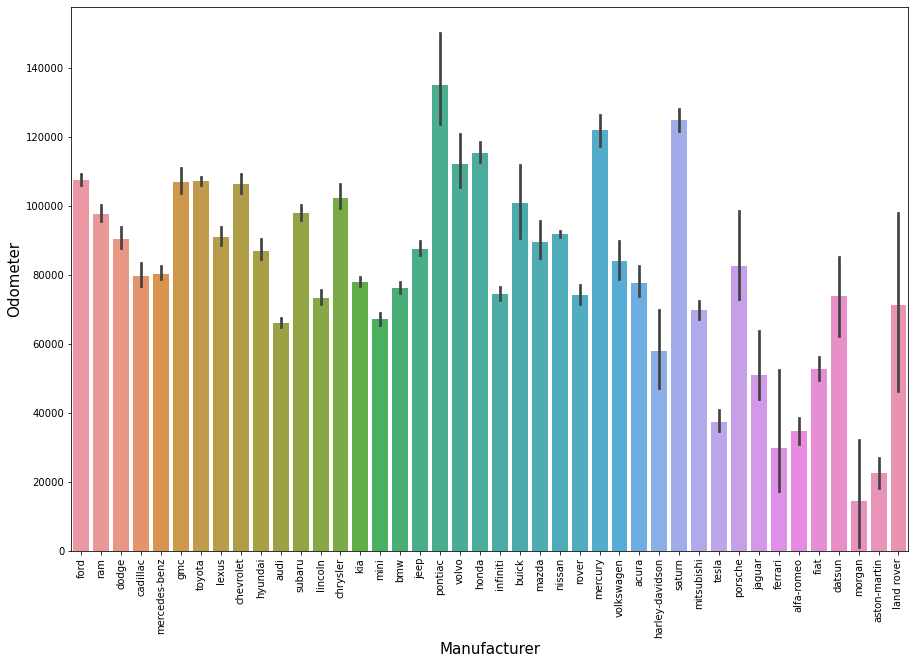

In [21]:
df=df.sort_values(by=['odometer'],ascending=True)
plt.figure(figsize=(15,10))
sns.barplot(x=df.manufacturer, y=df.odometer)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer', fontsize=15)
plt.ylabel('Odometer',fontsize=15)
plt.show()

#### Visualize years in production

Text(0, 0.5, 'Production Count')

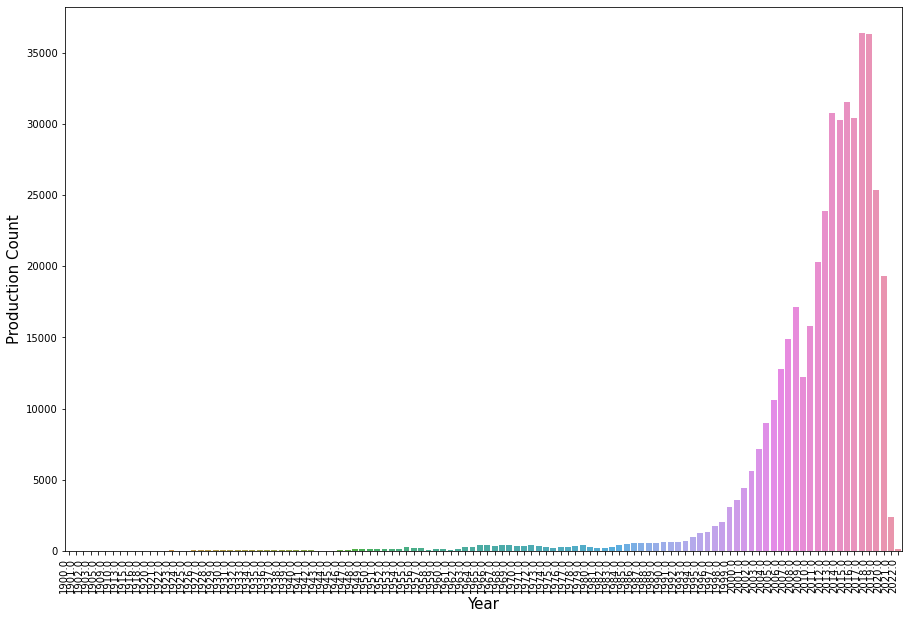

In [22]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='year',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);
plt.xlabel("Year",fontsize=15)
plt.ylabel("Production Count",fontsize=15)

#### Visualize top 10 manufacturers 

C:\Users\yauli\AppData\Local\Temp/ipykernel_10308/2051218945.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



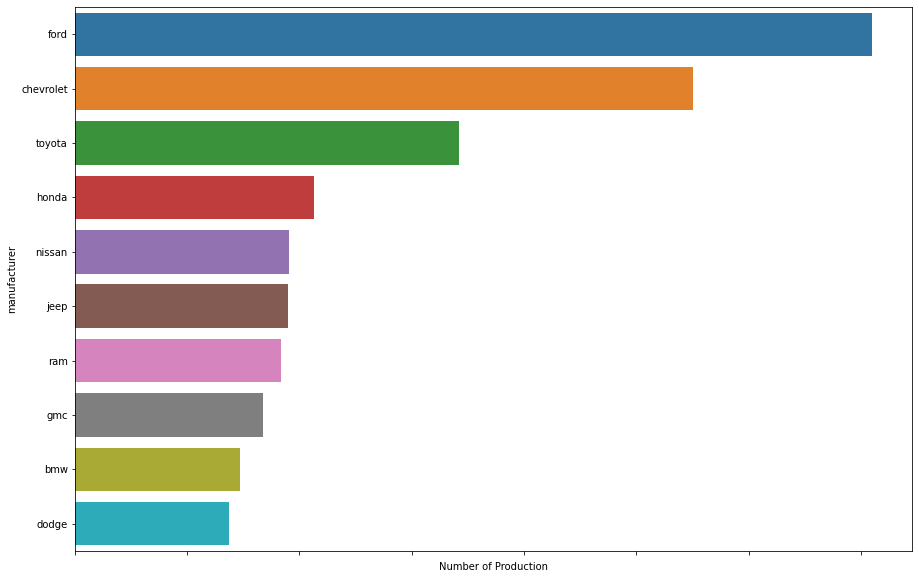

In [28]:
import warnings
manufacturers_top10 = df['manufacturer'].value_counts().iloc[:10]
manufacturers = pd.DataFrame({'manufacturer': manufacturers_top10.index, 'Number of Production': manufacturers_top10.values})
plt.figure(figsize=(15,10))
ax = sns.barplot(y='manufacturer',x='Number of Production',data=manufacturers, order=manufacturers['manufacturer']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);

#### Visualize Top 10 Most Popular models

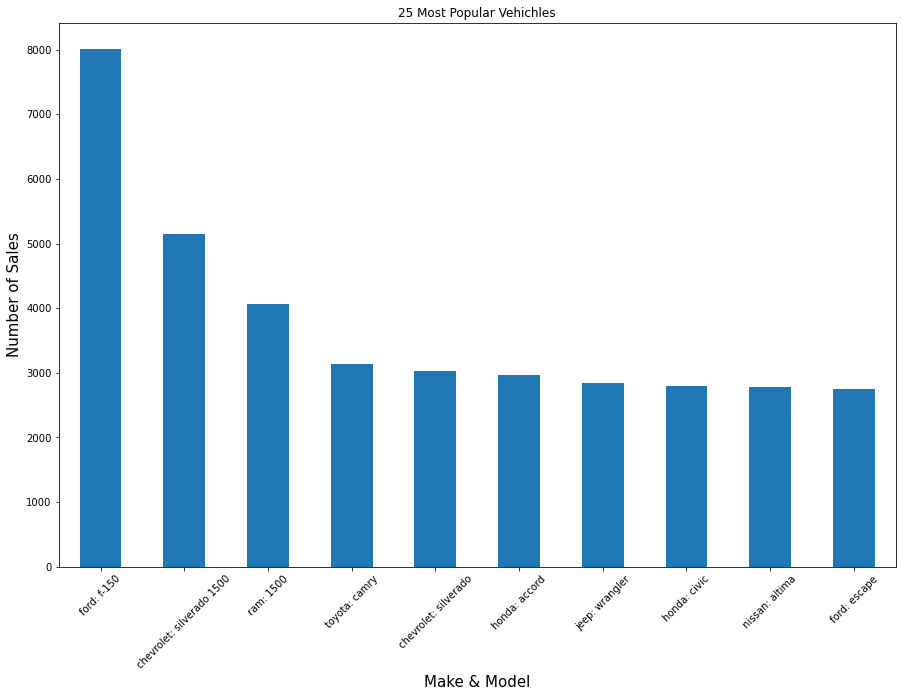

In [24]:
#Take a look at the most popular vehicles for sale
df['make_model'] = df['manufacturer'] + ': ' + df['model'] #add a column with the make and model in one string (for plotting)
com_cars = df.make_model.value_counts()[:10] #the top 10 most popular cars
fig = com_cars.plot.bar(figsize=(15,10))
plt.xlabel('Make & Model',fontsize=15)
plt.ylabel('Number of Sales',fontsize=15)
plt.title('25 Most Popular Vehichles')
plt.xticks(rotation=45)
plt.show()

It's not surprised that the top 10 brand orders by odometer are what we are expected. Honda, Ford, Toyota and a few others have been operating the business in the U.S for more than 30 decades, ever since the car industry started growing. They have a long history  and a good reputation for making the excellent quality for the long-range car that you barely need to do a lot of maintenance after you purchase them. The bar chart honestly reflects our assumptions.

If we look even closer to the brands, the top 10 brands are not identified as what we called luxuary car. 

#### Cylinder Pie Chart

In [25]:
cylindersframe = pd.DataFrame({"Cylinders":df.cylinders.value_counts().index,"Car_cylinders":df.cylinders.value_counts().values})
cylindersframe["Cylinders"] = cylindersframe["Cylinders"].apply(lambda x : "" + str(x))
cylindersframe.set_index("Cylinders",inplace=True)

In [26]:
p1 = [go.Pie(labels = cylindersframe.index,values = cylindersframe.Car_cylinders,hoverinfo="percent+label+value",hole=0.5,marker=dict(line=dict(color="#000002",width=0.5)))]
layout4 = go.Layout(title="Cylinders Pie Chart")
fig4 = go.Figure(data=p1,layout=layout4)
plt.figure(figsize=(15,10))
iplot(fig4)

<Figure size 1080x720 with 0 Axes>

#### What have we learned from this data?

● Offroad vehicle is by far the most driven, then Mini Van and Truck stood by the 2nd and the 3rd

● Median price for used vehicles are growing every year by year since 2000. However, there's a slightly downhill trends happened after 2020. This could be the result of the pandemic. The demand for used car market is creasing during the pandemic, but the support is lacking.

● White / Black / Silver are the most popular paint

● Ford / Chevrolet / Toyota have the most options in the Used Car market

● 4.6.8 cyliners covered 98.1% of the car in Used Car market

#### Data limitation

This data scraped every few months. Based on the time I downloaded this dataset, the data will be only providing up to **2022-04-20**. However, as we noticed earlier, the year 2021 and 2022 have very limited data to showcase to entire picture. This happened might be because the year of production are relatively new.